In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 📥 Chargement des volumes NIfTI depuis un dossier
def load_patient_volumes(data_dir):
    patients = {}
    for filename in sorted(os.listdir(data_dir)):
        if filename.endswith(".nii") or filename.endswith(".nii.gz"):
            parts = filename.split("_")
            patient_id = parts[0]
            timepoint = parts[1].replace(".nii.gz", "").replace(".nii", "")
            if patient_id not in patients:
                patients[patient_id] = {}
            path = os.path.join(data_dir, filename)
            img = nib.load(path)
            patients[patient_id][timepoint] = img.get_fdata()
    return patients

In [9]:
# 📂 Définir le dossier contenant les données et charger les patients
data_dir = "/home/perfect/Documents/GitHub/projet-AI/data/95_Glioma"  

if not os.path.exists(data_dir):
	print(f"❌ Le dossier '{data_dir}' n'existe pas. Veuillez vérifier le chemin.")
	patient_data = {}
else:
	patient_data = load_patient_volumes(data_dir)

In [10]:
# 🔍 Inspection des données chargées
for patient_id, timepoints in patient_data.items():
    print(f"📌 {patient_id}")
    for time, volume in timepoints.items():
        print(f"  - {time} : shape = {volume.shape}, min = {volume.min():.2f}, max = {volume.max():.2f}")

In [12]:
# 🖼️ Visualisation des coupes axiales centrales de chaque volume
def show_all_slices(data):
    for patient_id, timepoints in data.items():
        for time, volume in timepoints.items():
            z = volume.shape[2] // 2
            plt.imshow(volume[:, :, z], cmap='gray')
            plt.title(f"{patient_id} - {time}")
            plt.axis('off')
            plt.show()

show_all_slices(patient_data)

In [16]:
import nibabel as nib

# Charger l'image depuis le fichier .nii ou .nii.gz
img = nib.load("/home/perfect/Documents/GitHub/projet-AI/data/95_Glioma/BraTS-SSA-00014-000/BraTS-SSA-00014-000-seg.nii.gz")

# Extraire les données sous forme de tableau NumPy
volume = img.get_fdata()


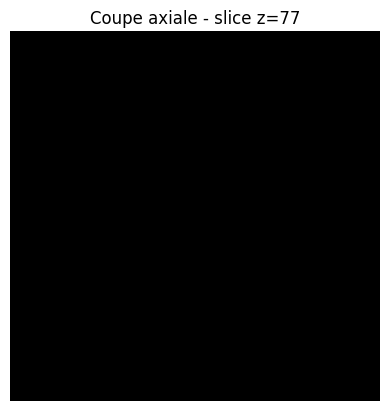

In [17]:
import matplotlib.pyplot as plt

# Choisir la coupe au milieu de l'axe z
z = volume.shape[2] // 2

# Afficher la coupe z en niveau de gris
plt.imshow(volume[:, :, z], cmap='gray')
plt.title(f"Coupe axiale - slice z={z}")
plt.axis('off')
plt.show()


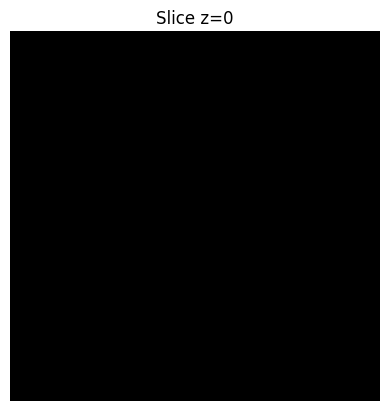

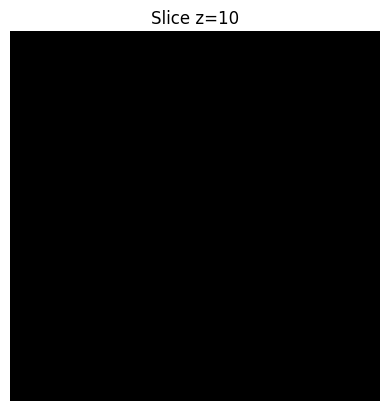

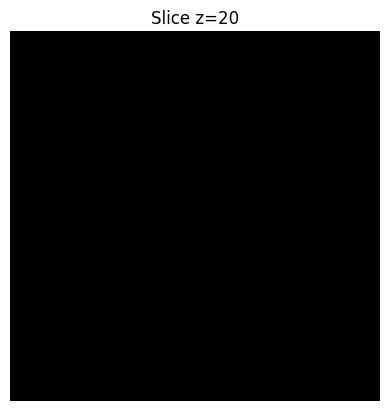

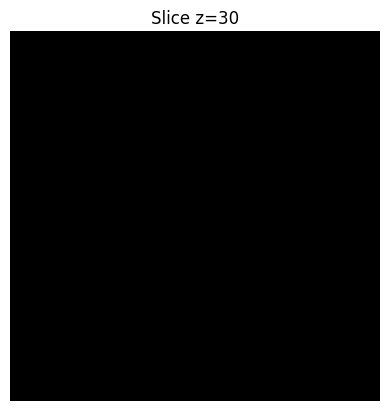

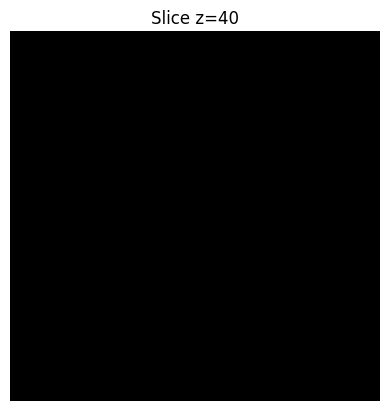

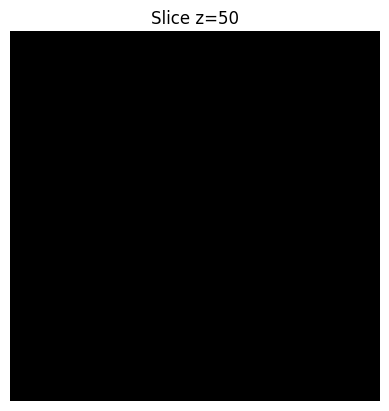

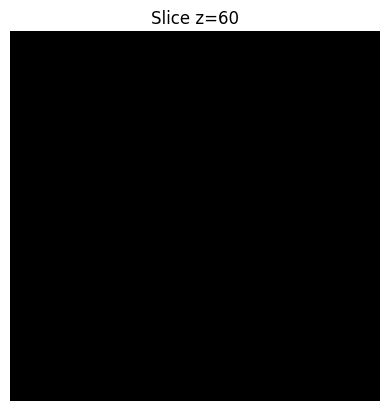

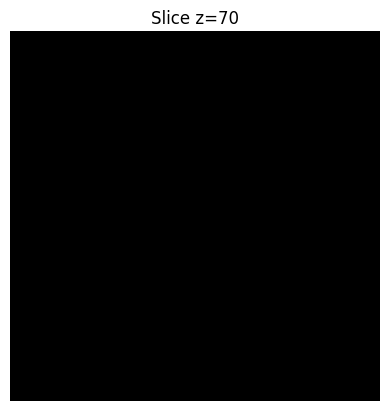

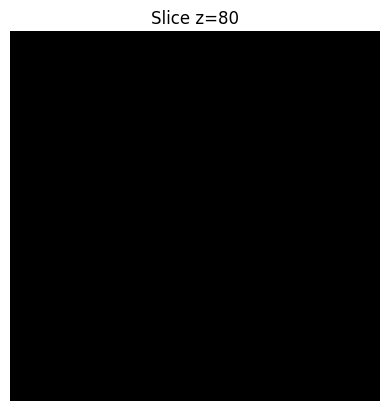

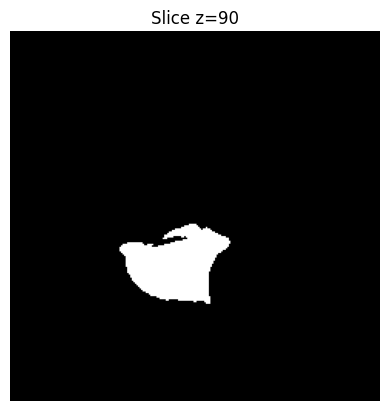

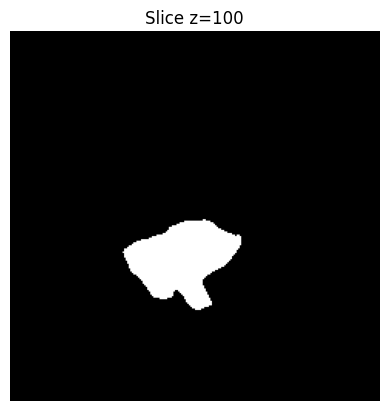

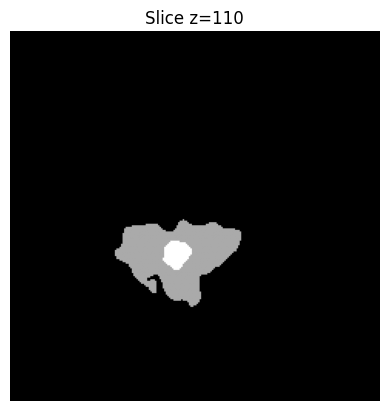

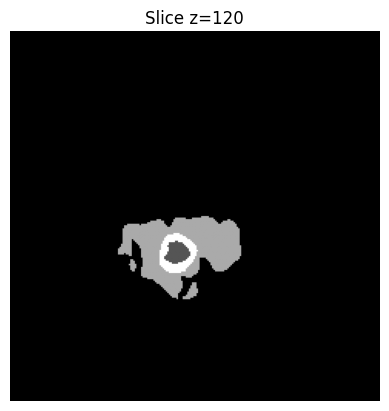

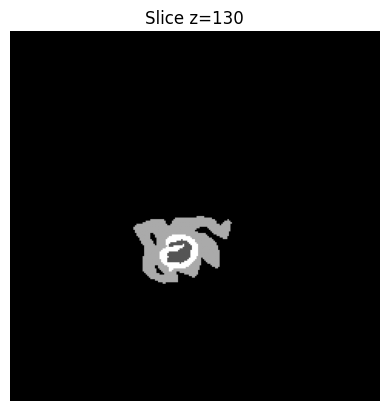

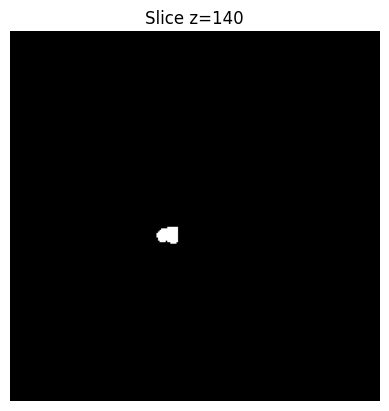

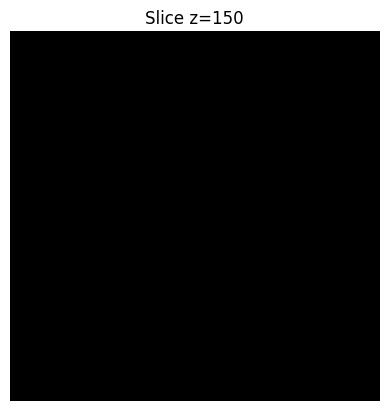

In [18]:
for z in range(0, volume.shape[2], 10):  # toutes les 10 slices
    plt.imshow(volume[:, :, z], cmap='gray')
    plt.title(f"Slice z={z}")
    plt.axis('off')
    plt.show()


In [21]:
from ipywidgets import interact

def view_slice(z):
    plt.imshow(volume[:, :, z], cmap='gray')
    plt.title(f"Slice z={z}")
    plt.axis('off')
    plt.show()

interact(view_slice, z=(0, volume.shape[2]-1))


interactive(children=(IntSlider(value=77, description='z', max=154), Output()), _dom_classes=('widget-interact…

<function __main__.view_slice(z)>